<a href="https://colab.research.google.com/github/Sajag28/CIFAR-10-DATASET-CNN-PREDICTION/blob/main/CIFAR10_Dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 2s 0us/step


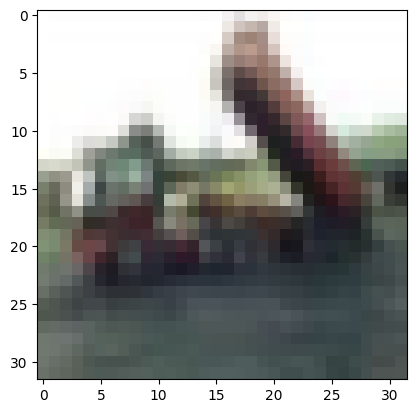

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
plt.imshow(X_train[2])

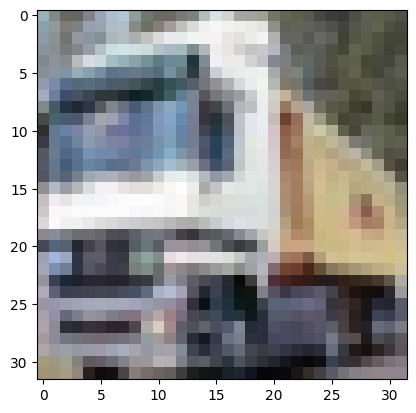

In [2]:
plt.imshow(X_train[1])

In [3]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X_train[index])


In [26]:
y_train=y_train.reshape(-1,)
y_train[:20]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6],
      dtype=uint8)

In [7]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[9]

'truck'

In [9]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])



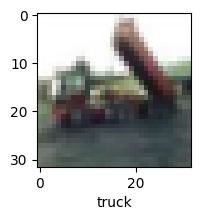

In [11]:
plot_sample(X_train,y_train,2)

In [27]:
X_train=X_train/255
X_test=X_test/255

In [33]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 62s 39ms/step - loss: 1.9662 - accuracy: 0.2823
Epoch 2/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.5633 - accuracy: 0.4391
Epoch 3/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4006 - accuracy: 0.5028
Epoch 4/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.3011 - accuracy: 0.5409
Epoch 5/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.2238 - accuracy: 0.5716
Epoch 6/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1551 - accuracy: 0.5953
Epoch 7/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0976 - accuracy: 0.6158
Epoch 8/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0480 - accuracy: 0.6338
Epoch 9/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0005 - accuracy: 0.6503
Epoch 10/15
1563/1563 [==============================] - 59s 38m

In [34]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9838 - accuracy: 0.6596


[0.983776867389679, 0.659600019454956]

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=cnn.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("Classification Report for Conv Neural Network\n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 5s 14ms/step
Classification Report for Conv Neural Network
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.86      0.68      0.76      1000
           2       0.70      0.41      0.52      1000
           3       0.53      0.41      0.46      1000
           4       0.52      0.69      0.60      1000
           5       0.53      0.66      0.59      1000
           6       0.85      0.61      0.71      1000
           7       0.66      0.78      0.71      1000
           8       0.72      0.83      0.77      1000
           9       0.66      0.80      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

